### Import the libraries 

In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
import seaborn as sns
import seaborn.objects as so
import matplotlib.pyplot as plt
df = pd.read_csv("C:/Users/anthony.greco/OneDrive - sv-sb.org/Data Analysis Training/Covid_Project.csv")

### lets give us the option to scroll the 

In [31]:
pd.set_option('display.max_rows',None)

### Encode the categorical values

In [32]:
wINDOW = ['0-2', '2-4', '4-6','6-12','ABOVE_12']
oencW = OrdinalEncoder(categories= [wINDOW])
df['WINDOW'] = oencW.fit_transform(df[['WINDOW']])

In [33]:

age = ["10th","20th","30th","40th","50th","60th","70th","80th","90th","Above 90th"]
oencA = OrdinalEncoder(categories =[age])
df['AGE_PERCENTIL'] = oencA.fit_transform(df[['AGE_PERCENTIL']])


### Explore the dataset. It appears null values decline the longer a patient stayed in the hospital, which makes sense.

In [34]:
corr_matrix = df.corr()['ICU']
corr_matrix = pd.DataFrame(corr_matrix)
corr_matrix['y']= abs(corr_matrix['ICU'])
corr_matrix.sort_values(by=['ICU'])
not_Selected_Features = corr_matrix[corr_matrix['ICU']< 0.004]
not_Selected_Features = not_Selected_Features.drop(['ICU'], axis = 1)
print(corr_matrix)
print(not_Selected_Features)

                                       ICU         y
PATIENT_VISIT_IDENTIFIER         -0.047547  0.047547
AGE_ABOVE65                       0.212198  0.212198
AGE_PERCENTIL                     0.238037  0.238037
GENDER                           -0.065543  0.065543
DISEASE GROUPING 1                0.061308  0.061308
DISEASE GROUPING 2                0.081883  0.081883
DISEASE GROUPING 3                0.077422  0.077422
DISEASE GROUPING 4                0.057456  0.057456
DISEASE GROUPING 5                0.087988  0.087988
DISEASE GROUPING 6               -0.006344  0.006344
HTN                               0.170247  0.170247
IMMUNOCOMPROMISED                 0.014357  0.014357
OTHER                            -0.048225  0.048225
ALBUMIN_MEDIAN                   -0.282270  0.282270
ALBUMIN_MEAN                     -0.282270  0.282270
ALBUMIN_MIN                      -0.282270  0.282270
ALBUMIN_MAX                      -0.282270  0.282270
ALBUMIN_DIFF                           NaN    

### most influential fields: RESPIRATORY_RATE_MAX   BLOODPRESSURE_SISTOLIC_DIFF    RESPIRATORY_RATE_DIFF BLOODPRESSURE_SISTOLIC_DIFF_REL  RESPIRATORY_RATE_DIFF_REL    RESPIRATORY_RATE_DIFF_REL    

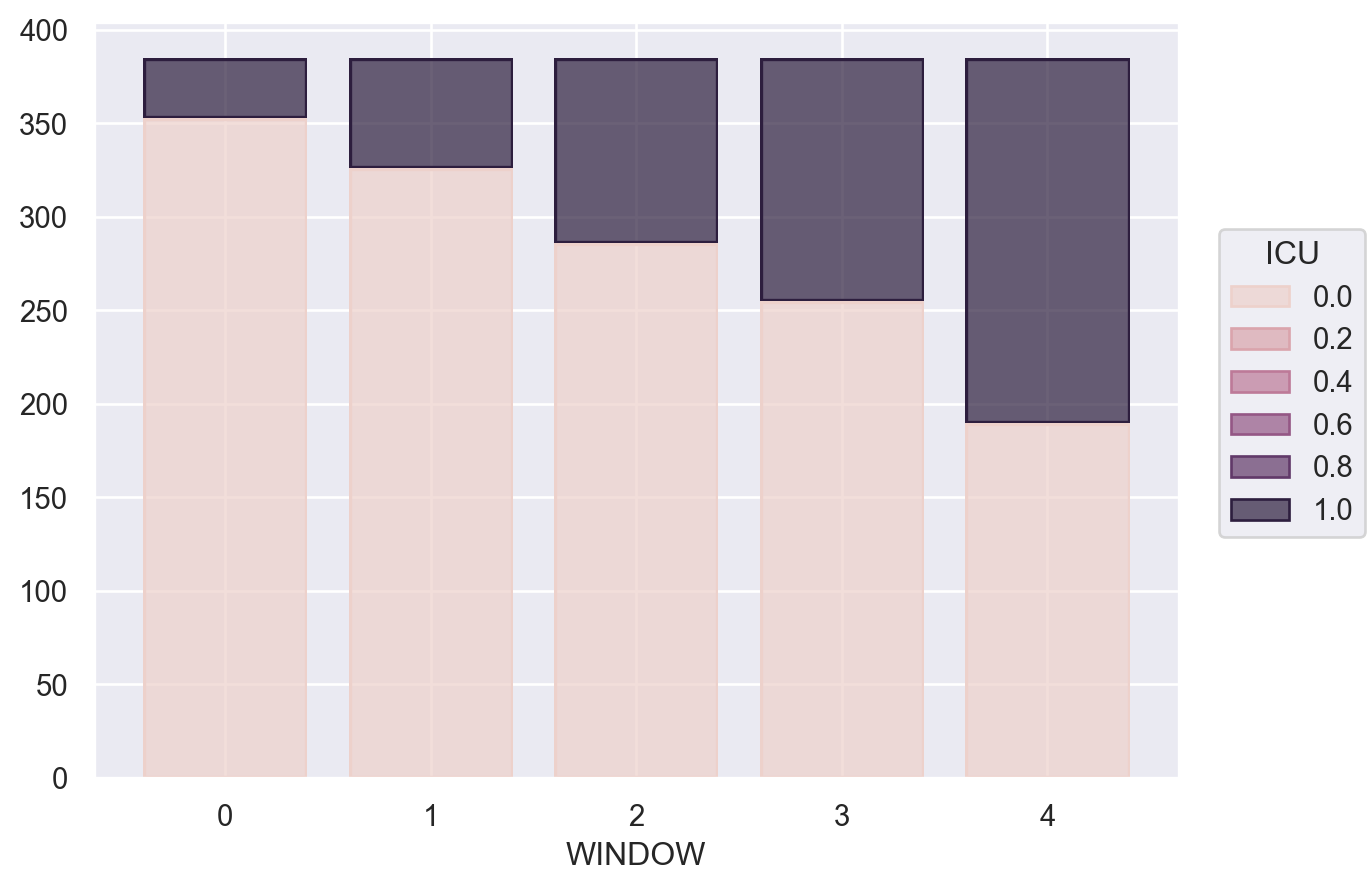

In [35]:
so.Plot(df, x="WINDOW", color="ICU").add(so.Bar(), so.Count(), so.Stack())

Ideally we woudld want to identify all the people as early as possible that did not go to the ICU by the fifth window so they can go home as early as possible. 

In [36]:
dfw_1= df[df['WINDOW']==1]
print(dfw_1.shape, dfw_1.isna().sum())

(385, 231) PATIENT_VISIT_IDENTIFIER              0
AGE_ABOVE65                           0
AGE_PERCENTIL                         0
GENDER                                0
DISEASE GROUPING 1                    1
DISEASE GROUPING 2                    1
DISEASE GROUPING 3                    1
DISEASE GROUPING 4                    1
DISEASE GROUPING 5                    1
DISEASE GROUPING 6                    1
HTN                                   1
IMMUNOCOMPROMISED                     1
OTHER                                 1
ALBUMIN_MEDIAN                      208
ALBUMIN_MEAN                        208
ALBUMIN_MIN                         208
ALBUMIN_MAX                         208
ALBUMIN_DIFF                        208
BE_ARTERIAL_MEDIAN                  208
BE_ARTERIAL_MEAN                    208
BE_ARTERIAL_MIN                     208
BE_ARTERIAL_MAX                     208
BE_ARTERIAL_DIFF                    208
BE_VENOUS_MEDIAN                    208
BE_VENOUS_MEAN               

we will need to use null values to try and predict in window 1 who is headed to the ICU. Maybe need to split the data set so that we know which patient. cna we tell who goes home? Null values 

In [37]:
dfw_1.dropna()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
6,1,1,8.0,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,1
36,7,0,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0
81,16,0,2.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0
86,17,0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.976190,-1.000000,-0.674614,-0.931292,-0.957153,-1.000000,-0.976125,-1.000000,1.0,1
141,28,0,3.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.928571,-0.979798,-0.911819,-0.748245,-0.931885,-0.904628,-0.931955,-0.979381,1.0,1
181,36,1,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.833333,-0.959596,-1.000000,-0.879195,-0.979644,-0.942275,-0.830999,-0.957857,1.0,0
206,41,1,6.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.666667,-0.858586,-0.689777,-0.399526,-0.891572,-1.000000,-0.663881,-0.858709,1.0,1
241,48,0,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,1
271,54,1,5.0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-0.781960,-0.677100,-1.000000,-1.000000,-1.000000,-1.000000,1.0,1
316,63,0,3.0,0,0.0,1.0,0.0,1.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.0,0


In [38]:
dfw_1.shape

(385, 231)

In [39]:
dfw_1 = df[df['WINDOW'] == 1]
dfw_2 = df[df['WINDOW'] == 2]
dfw_3 = df[df['WINDOW'] == 3]
dfw_4 = df[df['WINDOW'] == 4]
dfw_5 = df[df['WINDOW'] == 5]

The number of null values indicate that the columns with the highest coorelation to the target are the metrics only taken later in the patient's hospital visit. 

In [40]:
print(dfw_2.shape, dfw_2.isna().sum())

(385, 231) PATIENT_VISIT_IDENTIFIER              0
AGE_ABOVE65                           0
AGE_PERCENTIL                         0
GENDER                                0
DISEASE GROUPING 1                    1
DISEASE GROUPING 2                    1
DISEASE GROUPING 3                    1
DISEASE GROUPING 4                    1
DISEASE GROUPING 5                    1
DISEASE GROUPING 6                    1
HTN                                   1
IMMUNOCOMPROMISED                     1
OTHER                                 1
ALBUMIN_MEDIAN                      343
ALBUMIN_MEAN                        343
ALBUMIN_MIN                         343
ALBUMIN_MAX                         343
ALBUMIN_DIFF                        343
BE_ARTERIAL_MEDIAN                  343
BE_ARTERIAL_MEAN                    343
BE_ARTERIAL_MIN                     343
BE_ARTERIAL_MAX                     343
BE_ARTERIAL_DIFF                    343
BE_VENOUS_MEDIAN                    343
BE_VENOUS_MEAN               

In [41]:
print(dfw_3.shape, dfw_3.isna().sum())

(385, 231) PATIENT_VISIT_IDENTIFIER              0
AGE_ABOVE65                           0
AGE_PERCENTIL                         0
GENDER                                0
DISEASE GROUPING 1                    1
DISEASE GROUPING 2                    1
DISEASE GROUPING 3                    1
DISEASE GROUPING 4                    1
DISEASE GROUPING 5                    1
DISEASE GROUPING 6                    1
HTN                                   1
IMMUNOCOMPROMISED                     1
OTHER                                 1
ALBUMIN_MEDIAN                      329
ALBUMIN_MEAN                        329
ALBUMIN_MIN                         329
ALBUMIN_MAX                         329
ALBUMIN_DIFF                        329
BE_ARTERIAL_MEDIAN                  329
BE_ARTERIAL_MEAN                    329
BE_ARTERIAL_MIN                     329
BE_ARTERIAL_MAX                     329
BE_ARTERIAL_DIFF                    329
BE_VENOUS_MEDIAN                    329
BE_VENOUS_MEAN               

In [42]:
print(dfw_4.shape, dfw_4.isna().sum())

(385, 231) PATIENT_VISIT_IDENTIFIER             0
AGE_ABOVE65                          0
AGE_PERCENTIL                        0
GENDER                               0
DISEASE GROUPING 1                   1
DISEASE GROUPING 2                   1
DISEASE GROUPING 3                   1
DISEASE GROUPING 4                   1
DISEASE GROUPING 5                   1
DISEASE GROUPING 6                   1
HTN                                  1
IMMUNOCOMPROMISED                    1
OTHER                                1
ALBUMIN_MEDIAN                      11
ALBUMIN_MEAN                        11
ALBUMIN_MIN                         11
ALBUMIN_MAX                         11
ALBUMIN_DIFF                        11
BE_ARTERIAL_MEDIAN                  11
BE_ARTERIAL_MEAN                    11
BE_ARTERIAL_MIN                     11
BE_ARTERIAL_MAX                     11
BE_ARTERIAL_DIFF                    11
BE_VENOUS_MEDIAN                    11
BE_VENOUS_MEAN                      11
BE_VENOUS_MIN 

In [43]:
print(dfw_5.shape, dfw_5.isna().sum())

(0, 231) PATIENT_VISIT_IDENTIFIER            0.0
AGE_ABOVE65                         0.0
AGE_PERCENTIL                       0.0
GENDER                              0.0
DISEASE GROUPING 1                  0.0
DISEASE GROUPING 2                  0.0
DISEASE GROUPING 3                  0.0
DISEASE GROUPING 4                  0.0
DISEASE GROUPING 5                  0.0
DISEASE GROUPING 6                  0.0
HTN                                 0.0
IMMUNOCOMPROMISED                   0.0
OTHER                               0.0
ALBUMIN_MEDIAN                      0.0
ALBUMIN_MEAN                        0.0
ALBUMIN_MIN                         0.0
ALBUMIN_MAX                         0.0
ALBUMIN_DIFF                        0.0
BE_ARTERIAL_MEDIAN                  0.0
BE_ARTERIAL_MEAN                    0.0
BE_ARTERIAL_MIN                     0.0
BE_ARTERIAL_MAX                     0.0
BE_ARTERIAL_DIFF                    0.0
BE_VENOUS_MEDIAN                    0.0
BE_VENOUS_MEAN                 

In [44]:
df = df[['PATIENT_VISIT_IDENTIFIER','WINDOW','AGE_PERCENTIL', 'RESPIRATORY_RATE_DIFF_REL', 'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'ICU']]


In [45]:
df.isna().sum()

PATIENT_VISIT_IDENTIFIER        0
WINDOW                          0
AGE_PERCENTIL                   0
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
ICU                             0
dtype: int64

In [46]:
dfw_1 = df[df['WINDOW'] == 1]
dfw_2 = df[df['WINDOW'] == 2]
dfw_3 = df[df['WINDOW'] == 3]
dfw_4 = df[df['WINDOW'] == 4]
dfw_5 = df[df['WINDOW'] == 5]

In [47]:
dfw_1.isna().sum()
print(dfw_1.shape, dfw_1.isna().sum())


(385, 7) PATIENT_VISIT_IDENTIFIER        0
WINDOW                          0
AGE_PERCENTIL                   0
RESPIRATORY_RATE_DIFF_REL     231
TEMPERATURE_DIFF_REL          215
OXYGEN_SATURATION_DIFF_REL    212
ICU                             0
dtype: int64


In [48]:
dfw_2.isna().sum()


PATIENT_VISIT_IDENTIFIER        0
WINDOW                          0
AGE_PERCENTIL                   0
RESPIRATORY_RATE_DIFF_REL     185
TEMPERATURE_DIFF_REL          169
OXYGEN_SATURATION_DIFF_REL    171
ICU                             0
dtype: int64

In [49]:

dfw_3.isna().sum()


PATIENT_VISIT_IDENTIFIER       0
WINDOW                         0
AGE_PERCENTIL                  0
RESPIRATORY_RATE_DIFF_REL     63
TEMPERATURE_DIFF_REL          46
OXYGEN_SATURATION_DIFF_REL    46
ICU                            0
dtype: int64

### Set the index to back/ forward fill null values

In [53]:
df.set_index('PATIENT_VISIT_IDENTIFIER')
dffill = df.groupby(level=0).bfill()

In [ ]:
df.isna().sum()

In [26]:
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum()

In [28]:
df.fillna(method='bfill', inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.dtypes

RESPIRATORY_RATE_MAX           float64
BLOODPRESSURE_SISTOLIC_DIFF    float64
RESPIRATORY_RATE_DIFF          float64
ICU                              int64
dtype: object

In [58]:
df1=df.copy()

Train and test decision tree 

In [56]:
from sklearn.model_selection import train_test_split
y = df["ICU"]
X = df.drop(columns=["ICU"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier 
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

0.8103896103896104
              precision    recall  f1-score   support

           0       0.80      0.98      0.88       278
           1       0.89      0.36      0.52       107

    accuracy                           0.81       385
   macro avg       0.84      0.67      0.70       385
weighted avg       0.82      0.81      0.78       385



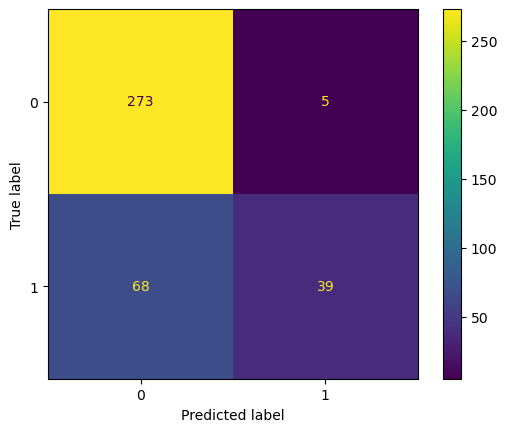

In [57]:
# Predict labels for the testing set
y_pred = model.predict(X_test)
# Evaluate model performance
from sklearn.metrics import accuracy_score, classification_report

# Generate classification 
print(accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

In [42]:
from sklearn import decomposition
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


std_slc = StandardScaler()
pca = decomposition.PCA()
dec_tree = tree.DecisionTreeClassifier()
pipe = Pipeline(steps=[('std_slc', std_slc),
                           ('pca', pca),
                           ('dec_tree', dec_tree)])

n_components = list(range(1,X.shape[1]+1,1))
criterion = ['gini', 'entropy']
max_depth = [2,4,6,8,10,12]
parameters = dict(pca__n_components=n_components,
                      dec_tree__criterion=criterion,
                      dec_tree__max_depth=max_depth)

clf_GS = GridSearchCV(pipe, parameters)
clf_GS.fit(X, y)
print('Best Criterion:', clf_GS.best_estimator_.get_params()['dec_tree__criterion'])
print('Best max_depth:', clf_GS.best_estimator_.get_params()['dec_tree__max_depth'])
print('Best Number Of Components:', clf_GS.best_estimator_.get_params()['pca__n_components'])
print(); print(clf_GS.best_estimator_.get_params()['dec_tree'])


Best Criterion: gini
Best max_depth: 2
Best Number Of Components: 41

DecisionTreeClassifier(max_depth=2)
